# Plotting and Visualization

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [51]:
# Interactive plotting
#%matplotlib notebook

%matplotlib inline

## A Brief matplotlib API Primer

Import convention:

`import matplotlib.pyplot as plt`

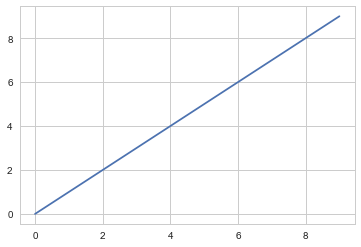

In [52]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

### Figures and Subplots

The plots in matplotlib reside within a `Figure` object. Create a new figure:

```
fig = plt.figure()
```

`figsize` will guarantee the figure has a certain size and aspect ratio if saved to disk

Create one or more subplots using `add_subplot`:

```
ax1 = fig.add_subplot(2, 2, 1)
```

This creates a figure of 2 X 2 = four plots. 

```
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
```

A plotting command will be drawn on the last figure and subplot used, creating one if necessary, thus hiding the figure and subplot creation. 

* `k--` is a style option instructing matplotlib to plot a black dashed line

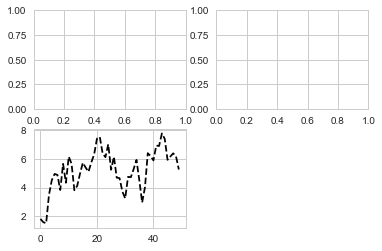

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

The objects returned by `fig.add_subplot` here are `AxesSubplot` objects, on which you can directly plot on the other empty subplots by calling each one's instance method:

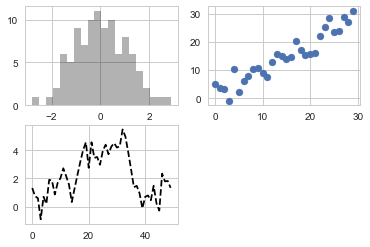

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Convenience method as very common task: `plt.subplots` creates a new figure and returns a NumPy array containing the created subplot objects:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2d391f0f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff2d3a2a7b8>]], dtype=object)

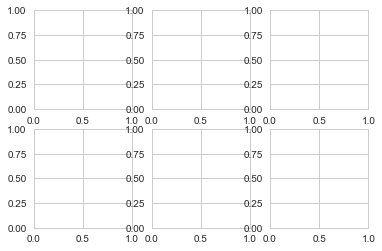

In [64]:
fig, axes = plt.subplots(2, 3)
axes

The `axes array` can be easily indexed like a 2D array, e.g. `axes[0,1]`. Indicate that subplots should have the same x- or y-axis with `sharex` or `sharey`, respectively.

_Table: pyplot.subplots options_

| Argument | Description |
| :--- | :--- |
| nrows | Number of rows of subplots
| ncols | Number of columns of subplots
| sharex | All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)
| sharey | All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)
| subplot_kw | Dict of keywords passed to add_subplot call used to create each subplot
| **fig_kw | Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))

#### Adjusting the spacing around subplots

Matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots, which is specified relative to the height and width of the plot. Change the spacing using the `subplots_adjust` method on `Figure` objects:

```
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

`wspace` and `hspace` control the percent of the figure width and height, respectively, to use as spacing between subplots. Here, the spacing is shrunk all the way to zero:

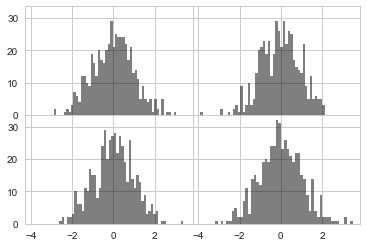

In [65]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

Axis labels overlap in this plot because matplotlib doesn't check if labels overlap. In a case like this you need to fix the labels yourself by specifying explicit tick locations and tick labels (see below).

### Colors, Markers, and Line Styles

Matplotlibs main `plot` function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style.

Green dashes:
```
ax.plot(x, y, 'g--')
```

Or:
```
ax.plot(x, y, linestyle='--', color='g')
```

Line plot with markers to highlight data points.
* The marker can be part of the style string, which must have color followed by marker type and line style

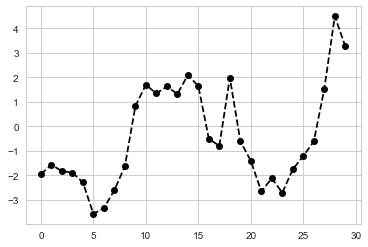

In [66]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

Or:
```
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

For line plots, subsequent points are linearly interpolated by default. This can be changed with the `drawstyle` option:

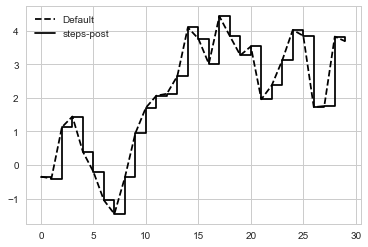

In [67]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

The `label` arguments were passed to `plot`, so a plot legend was created to identify each line using `plt.legend`

### Ticks, Labels, and Legends

Two main ways:
* The procedural `pyplot` interface (i.e. `matplotlib.pyplot`)
    * For interactive use
    * Consists of methods like `xlim` (plot range), `xticks` (tick locations), and `xticklabels` (tick labels)
        * Called with no arguments return current parameter value
        * Called with parameters sets the parameter value
* The more object-oriented native matplotlib API

All methods act on the active or most recently created `AxesSubplot`
* Each of them corresponds to two methods on the subplot object (e.g. for `xlim` there is `ax.get_xlim` and `ax.set_xlim`)

#### Setting the title, axis labels, ticks, and ticklabels

* Change x-axis ticks with `set_xticks` (where to place the ticks) and `set_xticklabels` (define the values for the labels)
* `rotation` defines the angle at which the labels are displayed.
* `set_xlabel` gives a name to the x-axis and `set_title` the subplot title.
* The y-axis can be modified the same way, replacing x with y in the code above.

Text(0.5,0,'Stages')

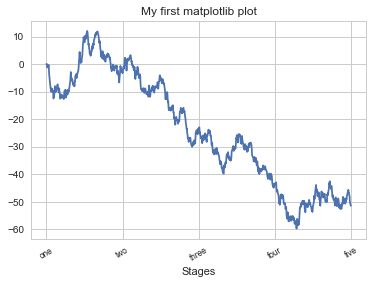

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

The axes class has a `set` method that allows batch setting of plot properties. We could also have written:

```
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)
```

#### Adding legends

The easiest way to add a legend is through the `label` argument.
Call either `ax.legend()` or `plt.legend()` to automatically create a legend:

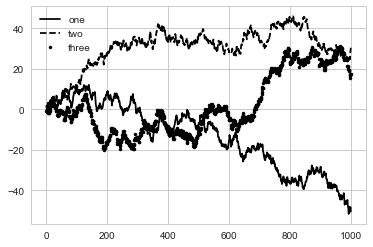

In [75]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

Draw your own plot annotations, e.g. consisting of text, arrows, or other shapes.
* `text` draws text at given coordinates on the plot (x, y):

```
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```

* `arrow`
* `annotate`

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

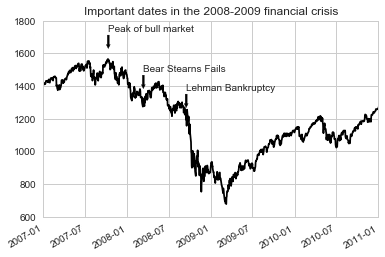

In [76]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

* `ax.annotate` draws labels at the indicated x and y coordinates
* `set_xlim` and `set_ylim` to manually set the start and end boundaries for the plot, rather than matplotlibs default
* `ax.set_title` adds a main title to the plot

Add a shape to a plot by creating the patch object `shp` and adding it to a subplot with `ax.add_patch(shp)`:

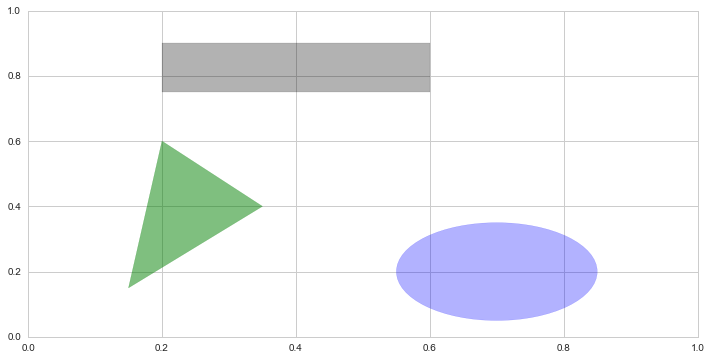

In [77]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

Save the active figure to file using `plt.savefig`:

```
plt.savefig('figpath.svg')
```

* File type is inferred from file extension.

Important options:
* `dpi` controls the dots-per-inch resolution
* `bbox_inches` can trim the whitespace around the actual figure

Get the same plot as PNG with minimal whitespace around the plot and at 400 DPI:

```
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

`savefig` doesn't have to write to disk, it can also write to any file-like object like a `BytesIO`:

```
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

_Table: Figure.savefig options_

| Argument | Description |
| :--- | :--- |
| fname | String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g.,.pdffor PDF or.pngfor PNG)
| dpi | The figure resolution in dots per inch; defaults to 100 out of the box but can be configured
| facecolor, edgecolor | The color of the figure background outside of the subplots; 'w' (white), by default
| format | The explicit file format to use ('png', 'pdf', 'svg', 'ps', 'eps', ...)
| bbox_inches | The portion of the figure to save; if 'tight' is passed, will attempt to trim the empty space around the figure

### matplotlib Configuration

Most of the default behavior of matplotlib can be customized, e.g. using the `rc` method.

E.g., set the global default figure size to be 10X10:

```
plt.rc('figure', figsize=(10, 10))

```

* The first argument to `rc` is the component you wish to customize, e.g. `'figure'`, `'axes'`, `'xtick'`, `'ytick'`, `'grid'`, `'legend'` 
* After that can follow a sequence of keyword arguments indicating the new parameters
* Write down the options for your program as a dict:

```
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

The configuration file _matplotlibrc_ in the _matplotlib/mpl-data_ directory contains a list of all options. If you customize this file and place it in your home directory titled _.matplotlibrc_, it will be loaded each time you use matplotlib.
* _Note: this is making plots irreproducible_

## Plotting with pandas and seaborn

* pandas itself has built-in methods for simplified visualization of data with multiple columns along with row and column labels
* `seaborn` is a library that modifies default matplotlib color schemes and plot styles.

### Line Plots

Series and DataFrame have a `plot` attribute for making basic plots. Default for `plot()` is a line plot.

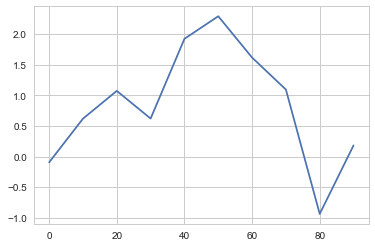

In [78]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Different `plot` options:
* The Series object's index is passed to matplotlib for plotting on the x-axis, disable this with `use_index=False`
* x- and y-axis ticks and limits can be adjusted with `xticks`, `xlim`, `yticks`, `ylim`

DataFrame's `plot` method plots each column as a different line on the same subplot and creates a legend automatically.

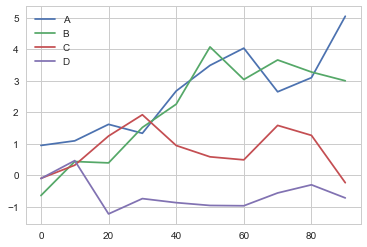

In [79]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

_Table: Series.plot method arguments_

| Argument | Description |
| :--- | :--- |
| label | Label for plot legend
| ax | matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot 
| style | Style string, like 'ko--', to be passed to matplotlib
| alpha | The plot fill opacity (from 0 to 1)
| kind | Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie' 
| logy | Use logarithmic scaling on the y-axis
| use_index | Use the object index for tick labels
| rot | Rotation of tick labels (0 through 360)
| xticks | Values to use for x-axis ticks
| yticks | Values to use for y-axis ticks
| xlim | x-axis limits (e.g., [0, 10])
| ylim | y-axis limits
| grid | Display axis grid (on by default)

DataFrame has options allowing for more flexibility with how columns are handled:

_Table: DataFrame-specific plot arguments_

| Argument | Description |
| :--- | :--- |
| subplots | Plot each DataFrame column in a separate subplot
| sharex | If subplots=True, share the same x-axis, linking ticks and limits
| sharey | If subplots=True, share the same y-axis
| figsize | Size of figure to create as tuple
| title | Plot title as string
| legend | Add a subplot legend (True by default)
| sort_columns | Plot columns in alphabetical order; by default uses existing column order

### Bar Plots

* `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots
* Series or DataFrame indexes can be used as the x (bar) or y (barh) ticks

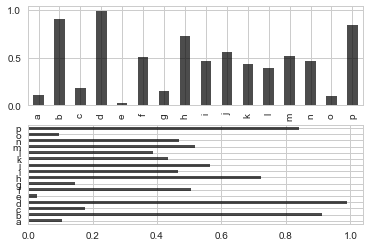

In [80]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

* `color='k'` and `alpha=0.7` set the color of the plots to black and use partial transparency on the filling

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. The name "Genus" on the DataFrame columns is used as legend title.

In [81]:
np.random.seed(12348)

In [82]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


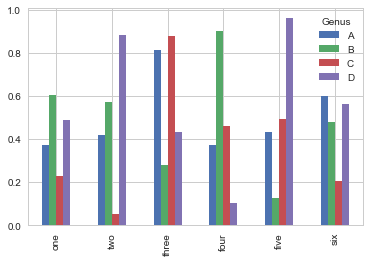

In [83]:
df.plot.bar()

Passing `stacked=True` results in the value in each row being stacked together.

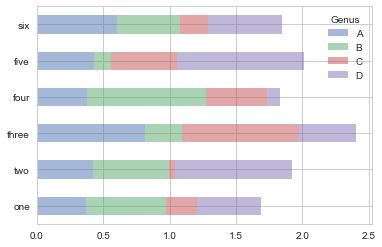

In [84]:
df.plot.barh(stacked=True, alpha=0.5)

Tipping dataset:
* Create a stacked bar plot showing the percentage of data points for each party size on each day
* Load the data using `read_csv` and make a cross-tabulation by day and party size

In [85]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [86]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

Normalize so that each row sums up to 1 and make the plot

In [87]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


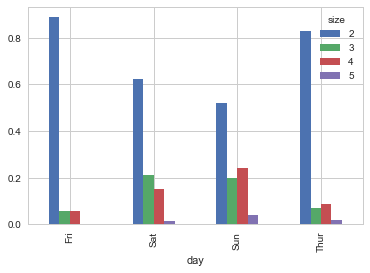

In [88]:
party_pcts.plot.bar()

The `seaborn` package can make things simpler with data that requires aggregation or summarization before making a plot

In [89]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


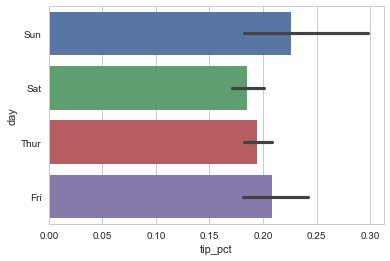

In [90]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

* Plotting functions in seaborn take a `data` argument, e.g. a DataFrame
* Other arguments refer to column names
* With multiple observations for each value in `day` in the example above, the bars are the average value of `tip_pct`
* Black lines drawn on the bars represent the 95% confidence interval

`seaborn.barplot` has a `hue` option to split by an additional categorical value:

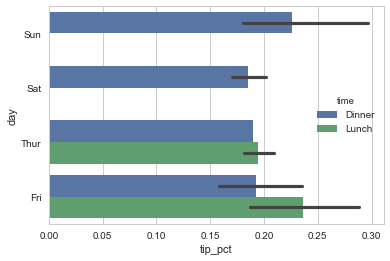

In [91]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

seaborn has automatically changed the aesthetics of the plots (color palette, plot background, grid line colors)
* Switch between plot appearances using `seaborn.set`:

In [95]:
sns.set(style="whitegrid")

### Histograms and Density Plots

Histograms give a discretized display of value frequency
* Data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted
* Histogram of tip percentages of the total bill from the tipping data from before with `plot.hist`

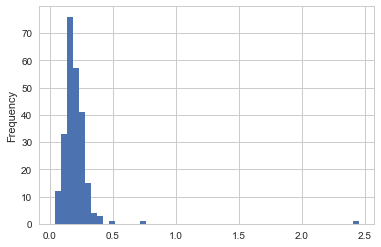

In [96]:
tips['tip_pct'].plot.hist(bins=50)

* A density plot is related
* It is formed by computing an estimate of a continuous probability distribution that might have generated the observed data
* Usually, this distribution is approximated as a mixture of "kernels", i.e. simpler distributions like the normal distribution
* Density plots are thus also known as kernel density estimate (KDE) plots
* `plot.kde` makes a density plot using the confentional mix of normals estimate

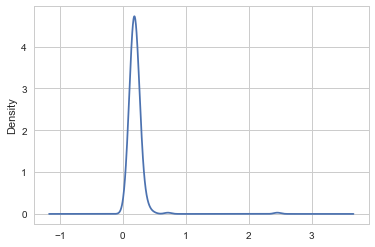

In [97]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier with `distplot`
* Bimodal distribution consisting of draws from two different standard normal distributions

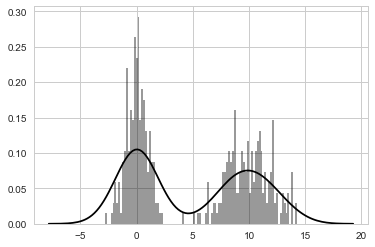

In [100]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

* Useful to study the relationship between two 1D data series
* Example: `macrodata` dataset from the statsmodels project, select a few variables, compute log differences

In [101]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Use seaborn's `regplot` method to make a scatterplot with a fitted linear regression line:

Text(0.5,1,'Changes in log m1 versus log unemp')

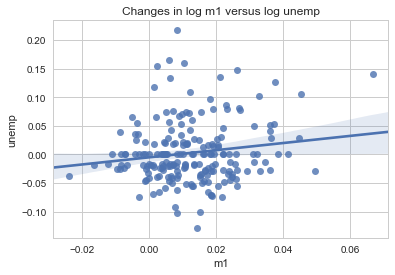

In [102]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In exploratory data analysis, it is helpful to look at all scatter plots among a group of variables (= _pairs_ plot or _scatter plot matrix_)
* Use seaborn's `pairplot` function
* Supports placing histograms or density estimates of each variable along the diagonal

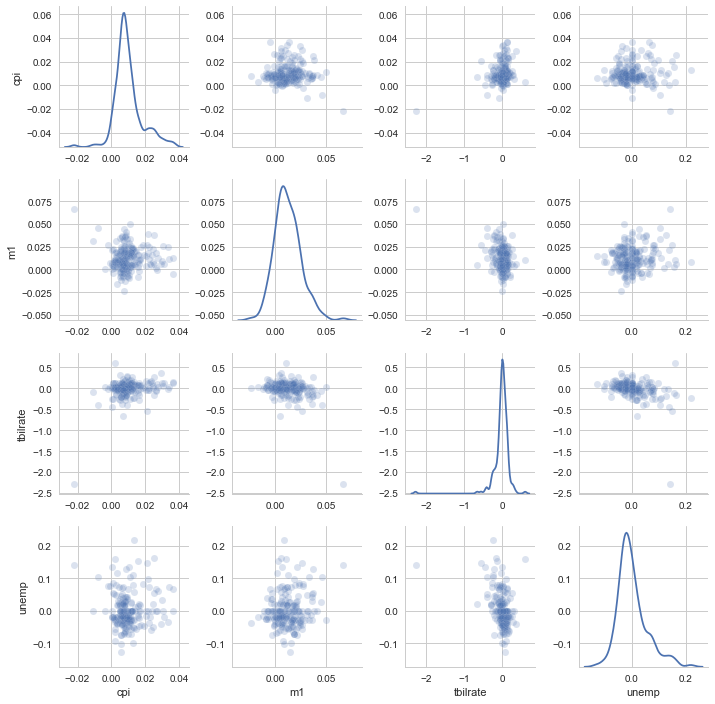

In [103]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

* `plot_kws` argument enables to pass down configuration options to the individual plotting calls on the off-diagonal elements

### Facet Grids and Categorical Data

Datasets with additional grouping dimensions
* Visualize data with many categorical variables with a facet grid
* seaborn: `factorplot`

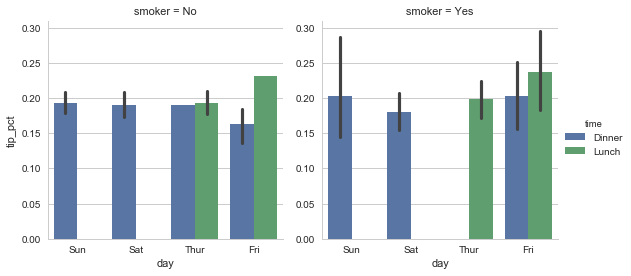

In [104]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

Instead of grouping by `'time'` by different bar colors within a facet, we can also expand the facet grid by adding one row per `time` value

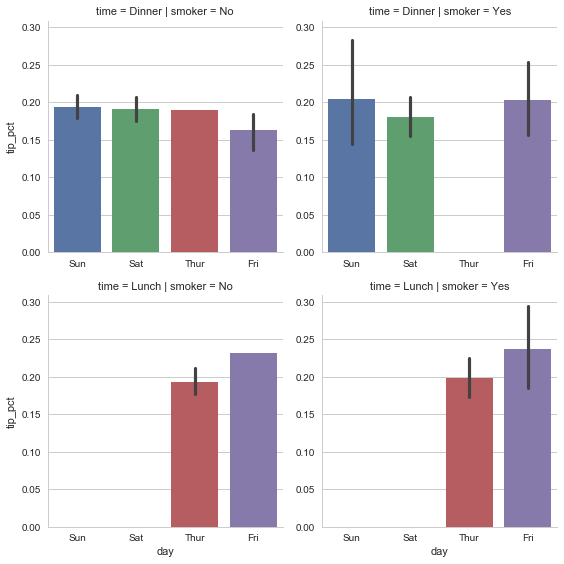

In [105]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

`factorplot` supports other plot types that may be useful
* box plots (showing the median, quartiles, outliers)

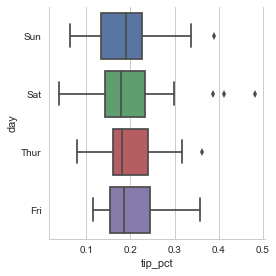

In [106]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

Interactive graphics for publication on the web:
* Bokeh
* Plotly

Static graphics for print or web:
* matplotlib plus pandas and seaborn

Explore the available tools for other data visualization requirements!

## Create a plot for the PyLadies meetup

From page 274: a Series's value frequency can be visualized using `value_counts:s.value_counts().plot.bar()`

In [39]:
s = pd.Series(np.random.randint(0, 10, 100))
s

0     9
1     2
2     7
3     6
4     6
5     4
6     6
7     7
8     4
9     0
     ..
90    0
91    6
92    9
93    5
94    6
95    2
96    9
97    9
98    2
99    9
Length: 100, dtype: int64

<IPython.core.display.Javascript object>


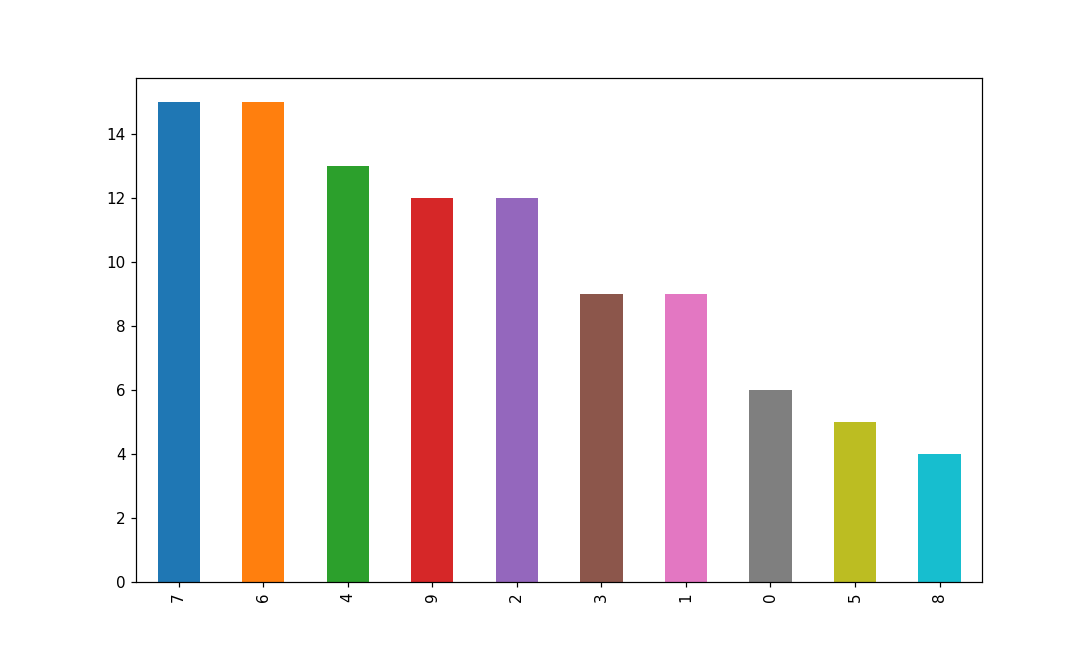

In [40]:
value_counts:s.value_counts().plot.bar()